In [57]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 



<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [5]:
UK_patents = pd.read_csv('data/Patents/UK_Patents_cited_wIPC.csv', header=0,sep=',')

In [6]:
UK_patents.head()

,app_nbr,appln_id,pub_nbr,person_id,inv_name,address,reg_code,ctry_code,reg_share,inv_share,prio_year,app_year,IPC
0,EP20020258685,1303,1324097,2975,"Maddison, John R.","10 Lonsdale Gardens,Tunbridge Wells, Kent TN1 1NU",UKJ42,GB,1.0,0.5,2001,2002,G02B021/00
1,EP20020258685,1303,1324097,2976,"Clinch, Noah F.","10 Lonsdale Gardens,Tunbridge Wells, Kent TN1 1NU",UKJ42,GB,1.0,0.5,2001,2002,G02B021/00
2,EP20060250283,1972,1691541,49614001,"Gouch, Martin Philip","16 Edenhall Close,Hemel Hempstead,Hertfordshir...",UKH23,GB,1.0,1.0,2005,2006,G02B007/38
3,EP20060251704,1977,1717134,5487,"Hayes, Anthony","68 Cheltenham Crescent Runcorn,Cheshire WA7 4YT",UKD71,GB,1.0,1.0,2005,2006,B62D053/08
4,EP20060794909,2112,1952644,5984,"JAMES, Jason, Lee","6 Cauldecott Close,Northampton NN4 9QN",UKF24,GB,1.0,1.0,2005,2006,H04Q001/14


In [7]:
UK_patents_grp = UK_patents.groupby('IPC')

In [201]:
PTC_patents = pd.read_csv('data/Patents/PCT_citation_UK_withIPC_loc.csv', header=0,sep=',',index_col=0)
PTC_patents = PTC_patents.sort_values(by = ['app_year'])

PTC_patents = PTC_patents[PTC_patents['ctry_code']=='GB']

In [202]:
PTC_patents

,Citing_app_nbr,Citing_appln_id,Cited_pub_nbr,Cited_Appln_id,Citn_origin,Citn_lag_year,Citn_lag_month,ISA,Citing_app_nbr_EPO,Cited_App_nbr_EPO,prio_year,app_year,IPC,pct_nbr,appln_id,inv_name,address,reg_code,ctry_code,inv_share
70990,WO2000000662,21293868,WO1999022060,23245667.0,APP,1.0,16.0,,EP19990928131,EP19970932920,1978,1978,C23C016/40,WO2000000662,23275816.0,"CHOY, Kwang-Leong","Cheylesmore, Coventry CV3 5EQ",UKG33,GB,0.5
70986,WO2000000662,21293868,WO1999022060,23245667.0,APP,1.0,16.0,,EP19790900070,EP19970932920,1978,1978,C23C016/40,WO2000000662,23275816.0,"CHOY, Kwang-Leong","Cheylesmore, Coventry CV3 5EQ",UKG33,GB,0.5
113,WO1982000152,2369864,WO1981003594,2359967.0,ISR,2.0,15.0,AU,EP19810901800,EP19790900680,1980,1981,C08L081/02,WO1982000152,22728213.0,"GLYNDWR, John Davies","Cowley, Uxbridge, Middlesex",UKI23,GB,1.0
280,WO1985000003,2392308,WO1982002732,6511269.0,ISR,4.0,42.0,AU,EP19840902522,EP19810901695,1983,1984,A01G025/02,WO1985000003,22809696.0,"Sanders, Bernard",Channel Islands,GBZZZ,GB,1.0
115,WO1986000185,22874605,WO1981003131,11495497.0,ISR,5.0,59.0,EP,EP19850902618,EP19790900680,1984,1985,H04L001/00,WO1986000185,22842477.0,"BRAMWELL, John",Ivybridge Devon PL21 9DH,UKK43,GB,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110810,WO2018055377,491738803,WO1993013302,11628656.0,APP,25.0,302.0,,EP20170777642,EP19900910797,2016,2017,G06K009/46,WO2018055377,484590352.0,"RAO, Dushyant",Oxford Oxfordshire OX1 3PJ,UKJ14,GB,0.2
183001,WO2019012149,506598412,WO2009104107,57027194.0,APP,10.0,119.0,,EP20180746115,EP20080839560,2017,2018,C07D403/06,WO2019012149,497002437.0,"Forrest, Michael, David","Poole, Dorset BH14 8LY",UKK21,GB,1.0
185277,WO2019014248,507280130,WO2015057873,423662559.0,APP,4.0,51.0,,EP20180752650,EP20130780381,2017,2018,H04L029/06,WO2019014248,498076832.0,"SHEN, Yun",Reading Berkshire RG2 6UH,UKJ11,GB,0.5
185273,WO2019014248,507280130,WO2010145998,316288693.0,APP,9.0,103.0,,EP20180752650,EP20090756784,2017,2018,H04L029/06,WO2019014248,498076832.0,"SHEN, Yun",Reading Berkshire RG2 6UH,UKJ11,GB,0.5


In [174]:
all_cited_epos_uk = set(UK_patents.app_nbr.values.astype(str))

In [175]:
all_cited_epos_ptc = set(PTC_patents.Cited_App_nbr_EPO.values.astype(str))

In [176]:
len(all_cited_epos.intersection(all_cited_epos_ptc))/len(all_cited_epos)

0.060463783450160916

In [177]:
all_citing_epos_ptc = set(PTC_patents.Citing_app_nbr_EPO.values.astype(str))

In [178]:
len(all_cited_epos_uk.intersection(all_citing_epos_ptc))/len(all_cited_epos_uk)

0.022770356654763478

In [179]:
len(all_cited_epos_uk)

45366

In [180]:
0.02 * len(all_cited_epos_uk)

907.32

In [185]:
with open('data/test_network_PTC_forGephi.csv', 'w') as f:
    
    f.write('source,target,Timestamps\n')
    
    for i,j,k in zip(PTC_patents.Citing_app_nbr_EPO,PTC_patents.Cited_App_nbr_EPO,PTC_patents.app_year):
        
        f.write(f'{i},{j},{k}\n')
        
with open('data/test_network_PTC_forNx.csv', 'w') as f:
    
    for i,j,k in zip(PTC_patents.Citing_app_nbr_EPO,PTC_patents.Cited_App_nbr_EPO,PTC_patents.app_year):
        
        f.write(f'{i},{j}\n')

In [186]:
import networkx as nx 


In [187]:
G = nx.read_edgelist('data/test_network_PTC_forNx.csv',create_using=nx.DiGraph(),delimiter=',')

In [188]:
In_degree_dist = [j for i,j in dict(G.in_degree()).items()]

Out_degree_dist = [j for i,j in dict(G.out_degree()).items()]

In [189]:
def degree_dist(L):
    
    x,y = np.unique(L,return_counts=True)
    
    return x,y/sum(y)

def ccdf(L):
    
    Ls = np.sort(np.unique(L))
    
    ccdf = np.zeros(len(Ls))
    
    for i,val in enumerate(Ls):
        
        ccdf[i] = np.sum(Ls>=val)/len(Ls)
        
    return Ls,ccdf

In [220]:
k_i,P_ki = degree_dist(In_degree_dist)
k_o,P_ko = degree_dist(Out_degree_dist)

k_i,ccdf_ki = ccdf(In_degree_dist)
k_o,ccdf_ko = ccdf(Out_degree_dist)

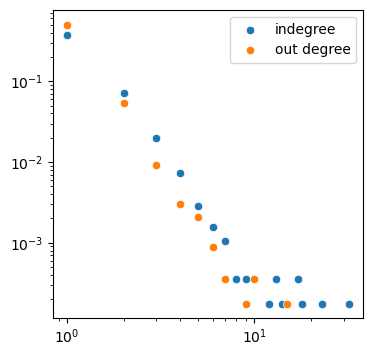

In [222]:
plt.figure(figsize=(4,4))
sns.scatterplot(x=k_i,y=P_ki,label='indegree')
sns.scatterplot(x=k_o,y=P_ko,label='out degree')
plt.xscale('log')
plt.yscale('log')

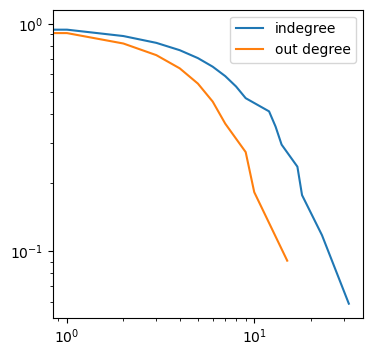

In [224]:
plt.figure(figsize=(4,4))
sns.lineplot(x=k_i,y=ccdf_ki,label='indegree')
sns.lineplot(x=k_o,y=ccdf_ko,label='out degree')
plt.xscale('log')
plt.yscale('log')

In [193]:
def create_patent_citation_network(DF,delta_T):
    
    '''
        This creates a directed citation network using the DF where the edge is counted only if it is younger
        than delta_T 
    '''
    
    return None 

### we don't have the years for all the nodes 

In [194]:
### Basic Statistics on the patent application 

PTC_patents_grouped_byYr = PTC_patents.groupby('app_year')

In [195]:
x,y = PTC_patents_grouped_byYr.size().index,PTC_patents_grouped_byYr.size().values

In [214]:
def lineplot(x,y,xlabel,ylabel,scale=True):
    
    fig = plt.figure(figsize=(4,3))
    
    ax = fig.add_subplot(111)
    
    sns.lineplot(x=x,y=y,ax=ax)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if scale:
        
        ax.set_yscale('log')
    fig.tight_layout()
    fig.show()
    return ax

/var/folders/nh/5jq2mlf15kvc6qs_xh074tn80000gn/T/ipykernel_29997/607368270.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Axes: xlabel='Years', ylabel='Citations'>

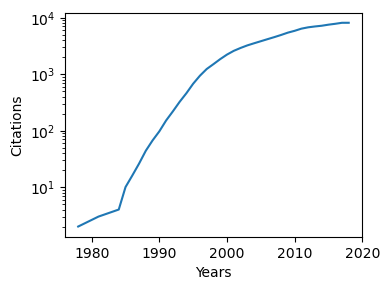

In [215]:
lineplot(x,np.cumsum(y),'Years','Citations')

/var/folders/nh/5jq2mlf15kvc6qs_xh074tn80000gn/T/ipykernel_29997/607368270.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Axes: xlabel='Years', ylabel='Citations'>

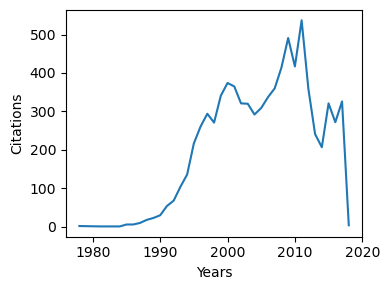

In [216]:
lineplot(x,y,'Years','Citations',scale=False)